# CI First HW - Fertilizers Product Data Analysis - Farsi Version
---

<h3 style='direction : rtl;font-family:Calibri'>
در این قسمت ما لیبلی به دیتاست اضافه کردیم تا مطابق آن هر کشور با قاره آن قابل تمایز باشد و تحلیل خود را بر مبنای قاره آسیا ارائه میدهیم.
</h3> 
    

---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
import os
os.chdir('c:\\Users\\ASUS\\Projects')

In [7]:
df = pd.read_csv('CI\\edited.csv',encoding='latin-1')

<h3 style='direction : rtl;font-family:Calibri'>
تغییرات را مشاهده میکنیم:
</h3> 

In [8]:
df.head()

,Area Code,Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag,continent
0,2,Afghanistan,4007,"Ammonia, anhydrous",5610,Import Quantity,2011,2011,tonnes,4.49,R,Asia
1,2,Afghanistan,4007,"Ammonia, anhydrous",5610,Import Quantity,2014,2014,tonnes,2.00,R,Asia
2,2,Afghanistan,4007,"Ammonia, anhydrous",5610,Import Quantity,2017,2017,tonnes,2.07,R,Asia
3,2,Afghanistan,4007,"Ammonia, anhydrous",5622,Import Value,2011,2011,1000 US$,2.69,R,Asia
4,2,Afghanistan,4007,"Ammonia, anhydrous",5622,Import Value,2014,2014,1000 US$,1.07,R,Asia


<h3 style='direction : rtl;font-family:Calibri'>
دیتاها را پاکسازی کرده و ستون های اضافی را حذف میکنیم.
</h3> 

In [11]:
df = df.drop(['Area Code','Item Code','Element Code','Year Code','Unit'],axis=1)

In [12]:
df.head()

,Area,Item,Element,Year,Value,Flag,continent
0,Afghanistan,"Ammonia, anhydrous",Import Quantity,2011,4.49,R,Asia
1,Afghanistan,"Ammonia, anhydrous",Import Quantity,2014,2.00,R,Asia
2,Afghanistan,"Ammonia, anhydrous",Import Quantity,2017,2.07,R,Asia
3,Afghanistan,"Ammonia, anhydrous",Import Value,2011,2.69,R,Asia
4,Afghanistan,"Ammonia, anhydrous",Import Value,2014,1.07,R,Asia


<h3 style='direction : rtl;font-family:Calibri'>
داده های آسیا را از دیتاست کلی جدا کرده و ستون قاره را نیز از دیتاست جدید حذف میکنیم.
</h3> 

In [13]:
Asia = df[df['continent']=='Asia']

In [14]:
Asia = Asia.drop('continent',axis=1)

In [57]:
Asia[Asia['Value']==0]

,Area,Item,Element,Year,Value,Flag
228,Afghanistan,Potassium chloride (muriate of potash) (MOP),Import Quantity,2017,0.0,R
234,Afghanistan,Potassium chloride (muriate of potash) (MOP),Import Value,2017,0.0,R
237,Afghanistan,Potassium nitrate,Import Value,2016,0.0,R
4778,Armenia,Ammonium nitrate (AN),Export Quantity,2007,0.0,Qm
4867,Armenia,Diammonium phosphate (DAP),Import Quantity,2008,0.0,Qm
...,...,...,...,...,...,...
162243,Yemen,Phosphate rock,Import Quantity,2004,0.0,Qm
162322,Yemen,Potassium chloride (muriate of potash) (MOP),Export Value,2016,0.0,R
162331,Yemen,Potassium nitrate,Import Quantity,2007,0.0,Qm
162383,Yemen,Sodium nitrate,Export Value,2016,0.0,R


In [71]:
Asia = Asia[(Asia['Flag']!='Z') & (Asia['Flag']!='P') & (Asia['Flag']!='A')]

---

Countries
---

<h3 style='direction : rtl;font-family:Calibri'>
در این بخش تحلیل مختصری درباره کشورهای آسیایی موجود در این دیتا ست خواهیم داشت.
</h3> 

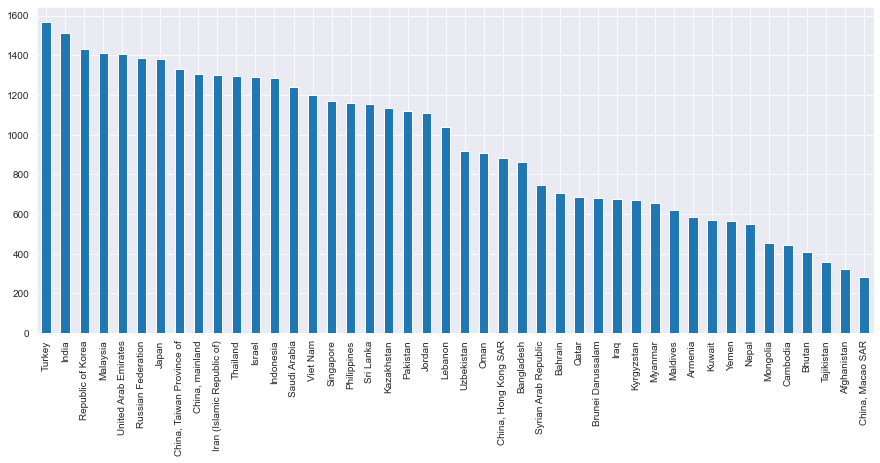

In [22]:
sns.set_style('darkgrid')
plt.figure(figsize=(15,6))
Asia['Area'].value_counts().plot(kind='bar')

<h5 style='direction : rtl;font-family:Calibri'>
همانطور که در نمودار نیز مشخص است از ۴۴ کشور آسیایی موجود در این دیتاست ترکیه بیشترین و چین(ماکايو) کمترین مشارکت را در اعلام دیتا داشته اند.
</h5> 

---

Elements
---

<h3 style='direction : rtl;font-family:Calibri'>
اکنون تنوع موارد مصرفی کود ها در قاره آسیا را بررسی میکنیم.
</h3> 

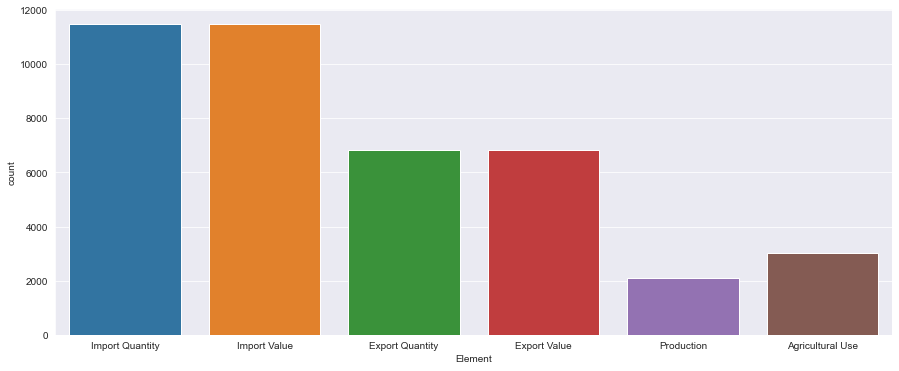

In [26]:
plt.figure(figsize=(15,6))
sns.countplot(Asia['Element'])

<h5 style='direction : rtl;font-family:Calibri'>
با توجه به اینکه بسیاری از کشور ها در مصرف/صادرات و... محصولات خاصی دیتا ثبت نکرده اند(در حدود 12000 ردیف) درباره کمترین مقدار ویژگی آنها صحبتی نکرده و به نشان دادن آمار بیشترین آنها در ادامه اکتفا میکنیم.
</h5> 

In [58]:
print(Asia[Asia['Element']=='Import Quantity']['Value'].max())
loc= Asia[Asia['Element']=='Import Quantity']['Value'].idxmax()
print(Asia.loc[loc])

10298331.57
Area                 India
Item        Phosphate rock
Element    Import Quantity
Year                  2012
Value          1.02983e+07
Flag                    Qm
Name: 66269, dtype: object


In [50]:
print(Asia[Asia['Element']=='Import Value']['Value'].max())
loc= Asia[Asia['Element']=='Import Value']['Value'].idxmax()
Asia.loc[loc]

6294714.0


Area                            India
Item       Diammonium phosphate (DAP)
Element                  Import Value
Year                             2008
Value                     6.29471e+06
Flag                               Qm
Name: 65701, dtype: object

<h5 style='direction : rtl;font-family:Calibri'>
کشور هند با 10298331.57 تن واردات سنگ فسفات در سال ۲۰۱۲ بیشترین مقدار واردات کود را و در سال ۲۰۰۸ با واردات مقدار 6294714.0 دلار دیامونیوم فسفات بیشترین هزینه را برای واردات کود در سال های ثبت شده در دیتا ست را داشته است. 
</h5> 

In [52]:
print(Asia[Asia['Element']=='Export Quantity']['Value'].max())
loc= Asia[Asia['Element']=='Export Quantity']['Value'].idxmax()
Asia.loc[loc]

13751466.28


Area       China, mainland
Item                  Urea
Element    Export Quantity
Year                  2015
Value          1.37515e+07
Flag                    Qm
Name: 30564, dtype: object

In [51]:
print(Asia[Asia['Element']=='Export Value']['Value'].max())
loc= Asia[Asia['Element']=='Export Value']['Value'].idxmax()
Asia.loc[loc]

4296038.9


Area                                 Russian Federation
Item       Potassium chloride (muriate of potash) (MOP)
Element                                    Export Value
Year                                               2008
Value                                       4.29604e+06
Flag                                                 Qm
Name: 124260, dtype: object

<h5 style='direction : rtl;font-family:Calibri'>
کشور چین با 13751466.28 تن صادرات اوریا در سال 2015 بیشترین مقدار صادرات کود و کشور روسیه در سال ۲۰۰۸ با صادرات مقدار 4296038.9 دلار پتاسیم کلراید بیشترین فروش را برای صادرات کود در سال های ثبت شده در دیتا ست داشته است. 
</h5> 

In [53]:
print(Asia[Asia['Element']=='Production']['Value'].max())
loc= Asia[Asia['Element']=='Production']['Value'].idxmax()
Asia.loc[loc]

24461300.0


Area             India
Item              Urea
Element     Production
Year              2015
Value      2.44613e+07
Flag                 W
Name: 66777, dtype: object

<h5 style='direction : rtl;font-family:Calibri'>
کشور هند با 24461300.0 تن تولید اوریا در سال 2015 بیشترین مقدار تولبد کود را در سال های ثبت شده در دیتا ست داشته است. 
</h5> 

In [55]:
print(Asia[Asia['Element']=='Agricultural Use']['Value'].max())
loc= Asia[Asia['Element']=='Agricultural Use']['Value'].idxmax()
Asia.loc[loc]

49046666.67


Area        China, mainland
Item        NPK fertilizers
Element    Agricultural Use
Year                   2016
Value           4.90467e+07
Flag                      E
Name: 29822, dtype: object

<h5 style='direction : rtl;font-family:Calibri'>
کشور چین با 49046666.67 تن استفاده از کود npk  درمصرف کشاورزی در سال 2016 بیشترین مقدار مصرف کود را در سال های ثبت شده در دیتا ست داشته است. 
</h5> 

---

Years
---

<h3 style='direction : rtl;font-family:Calibri'>
اکنون تنوع سال های ثبت شده را در قاره آسیا را بررسی میکنیم.
</h3> 

<h5 style='direction : rtl;font-family:Calibri'>
همانطور که در نمودار پایین مشاهده میشود، مقدار واردات و صادرات به طور کلی در حال افزایش، مقدار تولید تا سال 2014 در حال افزایش و پس از آن تا سال 2017 نمودار نزولی و مصارف کشاورزی در سال 2011 بیشترین مقدار و پس از ان دوباره کاهش داشته اند.
</h5>

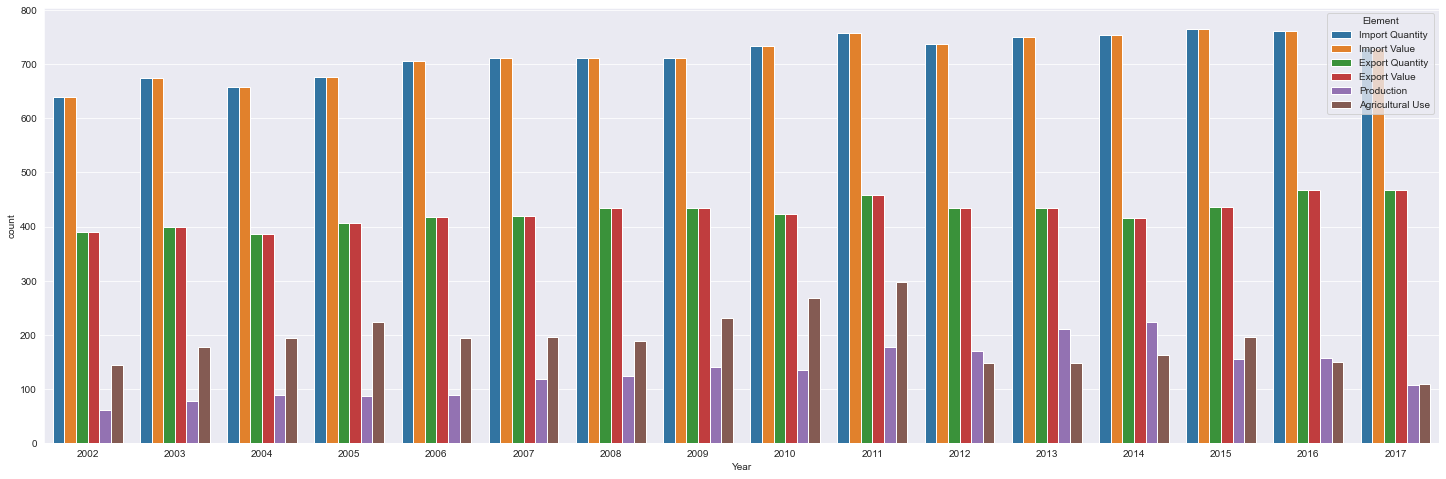

In [69]:
plt.figure(figsize=(25,8))
sns.countplot(Asia['Year'],hue=Asia['Element'])

---

Flags
---

<h3 style='direction : rtl;font-family:Calibri'>
اکنون تنوع نحوه جمع آوری داده ثبت شده را در قاره آسیا را بررسی میکنیم.
در ادامه بدلیل کاربردی نبودن این ویژگی در هدف آموزشی ما این ستون حذف می شود..
</h3>

    Flag column has eight different values which means the followings:

    A - Aggregate; may include official; semi-official; estimated or calculated data;
    E - Expert sources from FAO (including other divisions);
    Fb - Data obtained as a balance;
    Fm - Manual Estimation;
    P - Provisional official data;
    Qm - Official data from questionnaires and/or national sources and/or COMTRADE (reporters);
    R - Estimated data using trading partners database;
    W - Data reported on country official publications or web sites (Official) or trade country files;


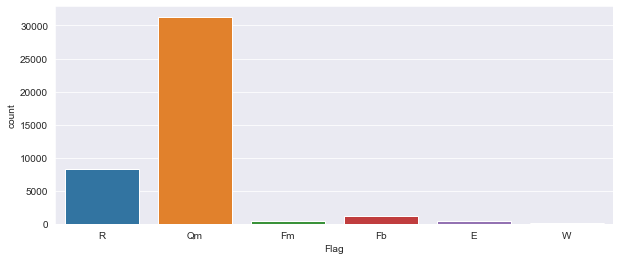

In [72]:
sns.set_style('darkgrid')
plt.figure(figsize=(10,4))
sns.countplot(Asia['Flag'])

In [75]:
Asia = Asia.drop('Flag',axis=1)

---

Items
---

<h3 style='direction : rtl;font-family:Calibri'>
در این بخش درباره کودهای مورد استفاده در مصارف مختلف در قاره آسیا تحلیل کوتاهی ارائه میدهیم.
</h3>

<h5 style='direction : rtl;font-family:Calibri'>
در میان 23 نوع کود مورد بررسی، کود "یوریا"و "سایر کودهای نیتروژنی" دارای بیشترین مقدار صادرات و واردات هستند.درزمینه تولید کودهای "یوریا" و سپس "کودهای "npk بیشترین سهم را دارند.
    در بخش کشاورزی نیز این دو نوع کود سهم بزرگی از دیتای کل را شامل میشوند.
</h5>

In [77]:
print('Number of different items envolved in this dataset : ',Asia['Item'].nunique())

Number of different items envolved in this dataset :  23


No handles with labels found to put in legend.


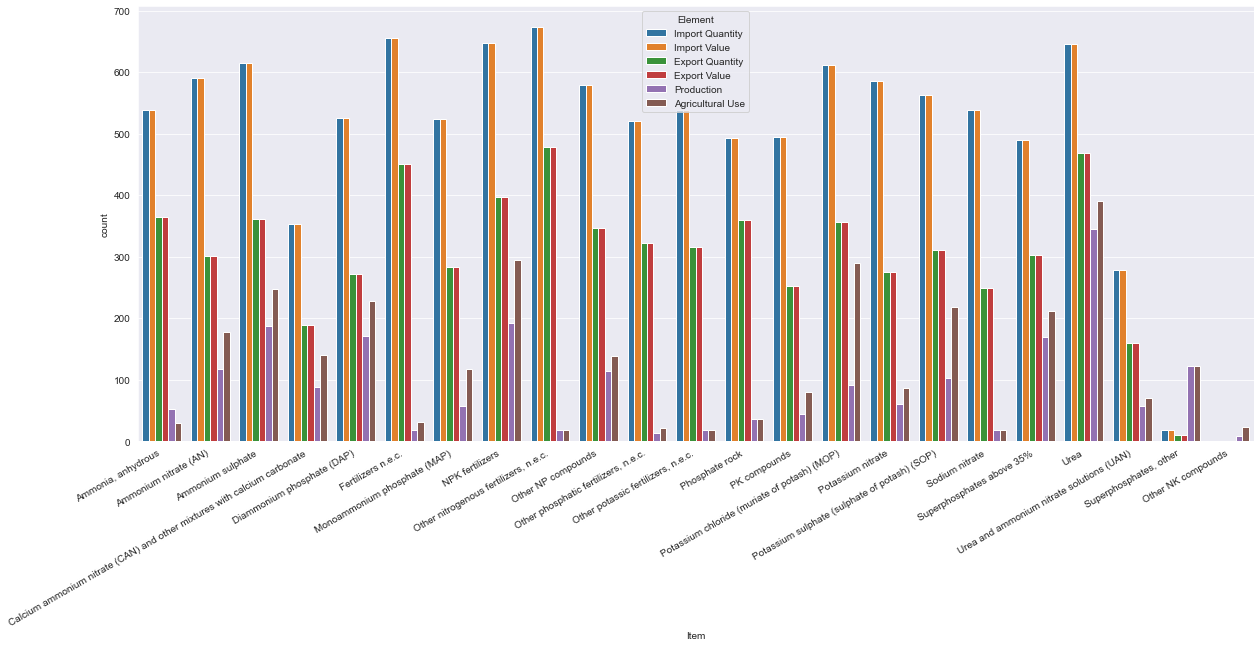

In [91]:
plt.figure(figsize=(20,8))
plt.xticks(rotation = 30,ha = 'right')
plt.legend(bbox_to_anchor=[0.5, 0.5], loc='upper left')
sns.countplot(Asia['Item'],hue=Asia['Element'])

Turkey as a sample
---

<h3 style='direction : rtl;font-family:Calibri'>
در این قسمت از دیتای کشور ترکیه به عنوان غنی ترین دیتای موجود در دیتاست آسیا استفاده کرده و تحلیل محتصری درباره روند رشد کودها در کاربردها و انواع مختلف ارائه میدهیم.
</h3>

In [92]:
Turkey = Asia[Asia['Area']=='Turkey']
Turkey = Turkey.drop('Area',axis=1)

In [93]:
Turkey = Turkey.set_index('Year')

<h5 style='direction : rtl;font-family:Calibri'>
بیشترین کود مصرفی در زمینه کشاورزی:
</h5>

In [106]:
maxT = Turkey[Turkey['Element']=='Agricultural Use']['Value'].max()
Turkey[(Turkey['Element']=='Agricultural Use')&(Turkey['Value']==maxT)]

,Item,Element,Value
Year,,,
2017,Ammonium nitrate (AN),Agricultural Use,1976770.0
2017,Urea,Agricultural Use,1976770.0


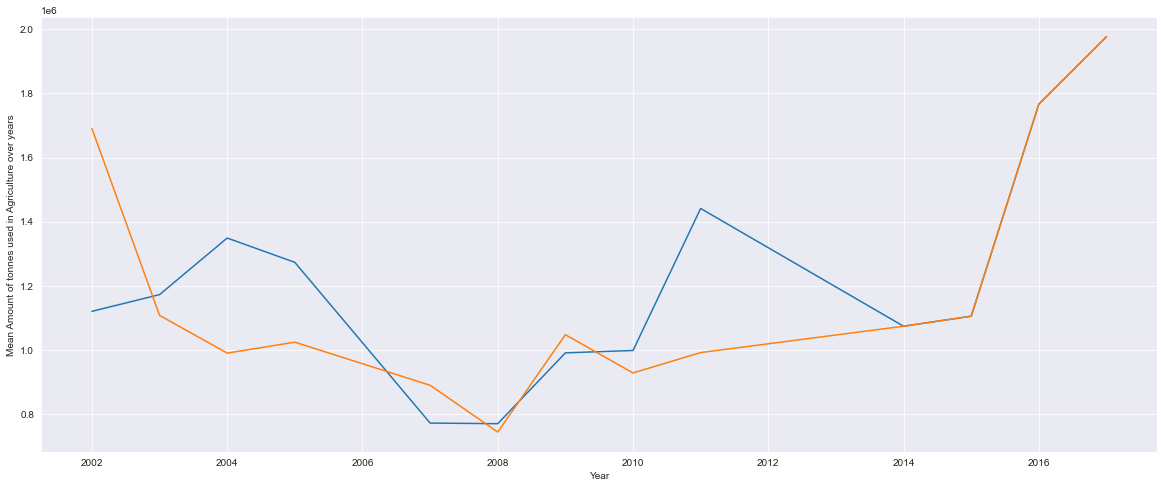

In [118]:
sns.set_style('darkgrid')
plt.ylabel('Mean Amount of tonnes used in Agriculture over years')
Turkey[(Turkey['Element']=='Agricultural Use')&(Turkey['Item']=='Urea')]['Value'].plot(figsize=(20,8))
Turkey[(Turkey['Element']=='Agricultural Use')&(Turkey['Item']=='Ammonium nitrate (AN)')]['Value'].plot(figsize=(20,8))

<h5 style='direction : rtl;font-family:Calibri'>
بیشترین کود و هزینه مصرفی در زمینه واردات:
</h5>

In [107]:
maxT = Turkey[Turkey['Element']=='Import Quantity']['Value'].max()
Turkey[(Turkey['Element']=='Import Quantity')&(Turkey['Value']==maxT)]

,Item,Element,Value
Year,,,
2017,Urea,Import Quantity,2810930.18


<h5 style='direction : rtl;font-family:Calibri'>
بیشترین کود مصرفی در زمینه صادرات::
</h5>

In [108]:
maxT = Turkey[Turkey['Element']=='Export Quantity']['Value'].max()
Turkey[(Turkey['Element']=='Export Quantity')&(Turkey['Value']==maxT)]

,Item,Element,Value
Year,,,
2011,Calcium ammonium nitrate (CAN) and other mixtu...,Export Quantity,269441.75


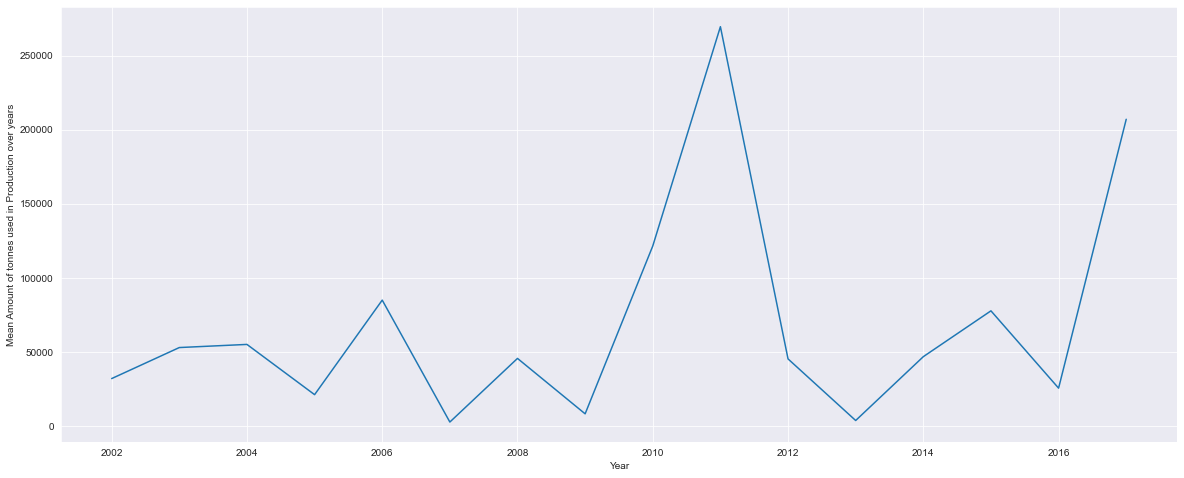

In [125]:
plt.ylabel('Mean Amount of tonnes used in Production over years')
Turkey[(Turkey['Element']=='Export Quantity')&(Turkey['Item']=='Calcium ammonium nitrate (CAN) and other mixtures with calcium carbonate')]['Value'].plot(figsize=(20,8))

<h5 style='direction : rtl;font-family:Calibri'>
بیشترین هزینه کود مصرفی در زمینه صادرات:
</h5>

In [110]:
maxT = Turkey[Turkey['Element']=='Export Value']['Value'].max()
Turkey[(Turkey['Element']=='Export Value')&(Turkey['Value']==maxT)]

,Item,Element,Value
Year,,,
2010,Diammonium phosphate (DAP),Export Value,121933.55


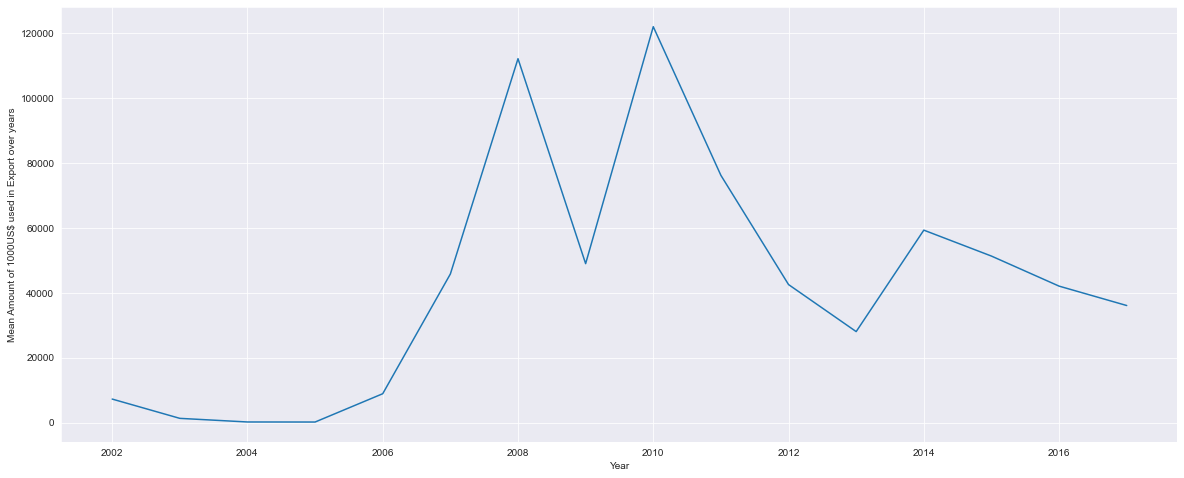

In [120]:
plt.ylabel('Mean Amount of 1000US$ used in Export over years')
Turkey[(Turkey['Element']=='Export Value')&(Turkey['Item']=='Diammonium phosphate (DAP)')]['Value'].plot(figsize=(20,8))

<h5 style='direction : rtl;font-family:Calibri'>
بیشترین کود مصرفی در زمینه تولید:
</h5>

In [111]:
maxT = Turkey[Turkey['Element']=='Production']['Value'].max()
Turkey[(Turkey['Element']=='Production')&(Turkey['Value']==maxT)]

,Item,Element,Value
Year,,,
2006,Calcium ammonium nitrate (CAN) and other mixtu...,Production,1131072.0


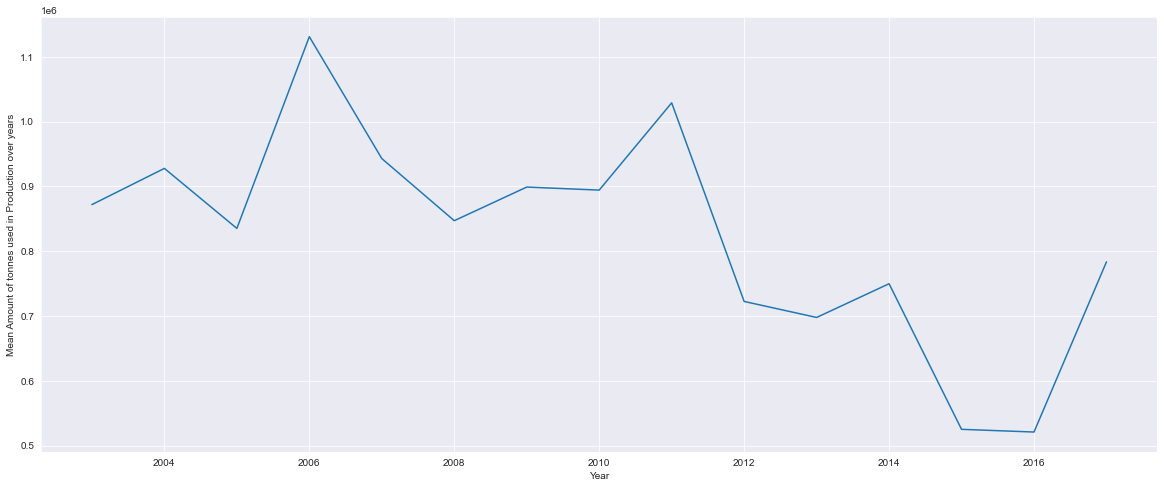

In [124]:
plt.ylabel('Mean Amount of tonnes used in Production over years')
Turkey[(Turkey['Element']=='Production')&(Turkey['Item']=='Calcium ammonium nitrate (CAN) and other mixtures with calcium carbonate')]['Value'].plot(figsize=(20,8))